# **Multiclass classification using ANN**

In [1]:
import pandas as pd
import tensorflow as tf

In [2]:
from sklearn import datasets

# Load the iris data
iris = datasets.load_iris()

# Creating a variable for the feature data
X = iris.data


# Creating a variable for the target data
y = iris.target
# Random split the data into training and testing set.
# Setting the size of the test data to be 25% of whole dataset.
# It will create four new datsets: training feature, training outcome,
# test feature, test outcome.
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.25, random_state=1)

In [3]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
X.shape[1]

4

Epoch 1/100
12/12 [==============================] - 1s 3ms/step - loss: 3.5877 - accuracy: 0.3036
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 3.3295 - accuracy: 0.3125
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 3.0911 - accuracy: 0.5625
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 2.8834 - accuracy: 0.5982
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 2.6874 - accuracy: 0.5982
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 2.4938 - accuracy: 0.5893
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 2.3048 - accuracy: 0.5357
Epoch 8/100
12/12 [==============================] - 0s 4ms/step - loss: 2.1492 - accuracy: 0.5089
Epoch 9/100
12/12 [==============================] - 0s 5ms/step - loss: 1.9933 - accuracy: 0.4821
Epoch 10/100
12/12 [==============================] - 0s 4ms/step - loss: 1.8531 - accuracy: 0.4643
Epoch 11/

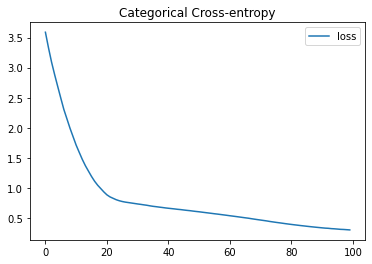

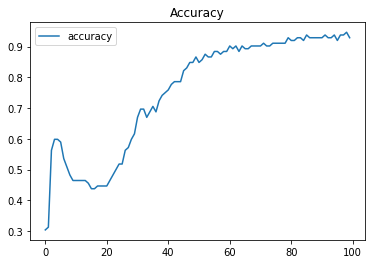

In [5]:
# Define Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(units=4, input_shape = (X.shape[1],), activation='relu', kernel_initializer = 'he_normal'))
model.add(Dense(units = 3, activation = 'softmax'))

# Compile Model
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Fit Model
history = model.fit(X_train, y_train, epochs = 100, batch_size = 10, verbose = 1)

# Evaluate Model
loss, acc = model.evaluate(X_test, y_test)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss']].plot(title="Categorical Cross-entropy")
history_df.loc[:, ['accuracy']].plot(title="Accuracy")

print('Accuracy of model is : %.3f' %acc)

In [6]:
print('Accuracy of model is : {:.2f} %'.format(acc*100))

Accuracy of model is : 84.21 %
